In [210]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [211]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [212]:
b = (np.mean(X*y)-np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [213]:
a = np.mean(y)-b*np.mean(X)
a

444.1773573243596

In [214]:
y_hat = round(a, 3) + round(b, 3)*X
y_hat

array([535.912, 562.122, 942.167, 968.377, 549.017, 627.647, 585.711,
       837.327, 758.697, 732.487])

In [215]:
mse = ((y-y_hat)**2).sum()/len(X)
mse

6470.417097199999

In [216]:
X_int = X.reshape(10, 1)
X_no_int = X.reshape(10, 1)
y = y.reshape(10, 1)

In [217]:
X_int = np.hstack([np.ones((10, 1)), X_int])

In [218]:
B_int = np.dot(np.linalg.inv(np.dot(X_int.T, X_int)), X_int.T@y)
B_int

array([[444.17735732],
       [  2.62053888]])

In [219]:
B_no_int = np.dot(np.linalg.inv(np.dot(X_no_int.T, X_no_int)), X_no_int.T@y)
B_no_int

array([[5.88982042]])

In [220]:
y_hat2=B_no_int[0]*X
y_hat2

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

In [221]:
mse2=((y.reshape(10,)-y_hat2)**2).sum()/len(X)
mse2

56516.8584157194

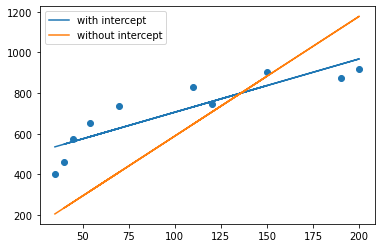

In [222]:
plt.scatter(X, y.reshape(10,))
plt.plot(X, B_int[0]+B_int[1]*X, label='with intercept')
plt.plot(X, B_no_int[0]*X, label='without intercept')
plt.legend()

plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [223]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [224]:
B1=0.1
n=len(X)
for i in range(1501):
    B1-=1e-6*(2/n)*np.sum((B1*X-y)*X)
    if i%100==0:
        print(f'iteration: {i}, B1={B1}, mse={np.sum((B1*X-y)**2)/n}')

iteration: 0, B1=0.25952808, mse=493237.7212546963
iteration: 100, B1=5.54537842245223, mse=58151.31823171113
iteration: 200, B1=5.868748638669329, mse=56522.97550129376
iteration: 300, B1=5.888531320728348, mse=56516.88130936019
iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
iteration: 500, B1=5.889815595583751, mse=56516.858416040064
iteration: 600, B1=5.889820124983314, mse=56516.85841572062
iteration: 700, B1=5.889820402076462, mse=56516.85841571941
iteration: 800, B1=5.88982041902807, mse=56516.8584157194
iteration: 900, B1=5.889820420065112, mse=56516.85841571941
iteration: 1000, B1=5.8898204201285544, mse=56516.85841571941
iteration: 1100, B1=5.889820420132437, mse=56516.85841571943
iteration: 1200, B1=5.889820420132673, mse=56516.85841571943
iteration: 1300, B1=5.889820420132673, mse=56516.85841571943
iteration: 1400, B1=5.889820420132673, mse=56516.85841571943
iteration: 1500, B1=5.889820420132673, mse=56516.85841571943


#### *3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [225]:
B0=0.1
B1=0.1
n=len(X)
mse=np.sum((B0+B1*X-y)**2)/n
for i in range(5001):
    B0 +=0.00001*np.sum((B0+B1*X-y)**2)/n
    B1-=0.00001*(2/n)*np.sum((B0+B1*X-y)*X)
    if np.sum((B0+B1*X-y)**2)/n < mse:
        mse = np.sum((B0+B1*X-y)**2)/n
    else:
        break
    if i%500==0:
        print(f'iteration: {i}, B0 = {B0}, B1={B1}, mse={np.sum((B0+B1*X-y)**2)/n}')

iteration: 0, B0 = 5.2819638399999995, B1=1.6845689773324803, mse=294477.22466541035
iteration: 500, B0 = 186.8331769965101, B1=4.519195828086825, mse=23269.915490693114
iteration: 1000, B0 = 275.50415952176047, B1=3.8646825071089568, mse=13687.442450956873
iteration: 1500, B0 = 332.5416596315094, B1=3.44407970929702, mse=9631.768564361575
iteration: 2000, B0 = 375.2490687256826, B1=3.129359562281924, mse=7675.634306943638
iteration: 2500, B0 = 410.99696681532123, B1=2.8660637886174967, mse=6749.707155647069
iteration: 3000, B0 = 443.8158873206641, B1=2.624451640244009, mse=6470.468947910892


#### Тема курсовой работы - линейная регрессия (датасет по ценам на недвижимость)